In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter



In [3]:
# Load the datasets
training_data = pd.read_csv('twitter_training.csv')
validation_data = pd.read_csv('twitter_validation.csv')


In [4]:
# Combine the datasets
data = pd.concat([training_data, validation_data])

In [5]:
# Determine the text column names
text_column = data.columns[-1]  # Assuming the text column is the last one


In [6]:
# Rename the text column for ease of use
data = data.rename(columns={text_column: 'text'})

In [7]:
# Drop rows where the text column has missing values
data = data.dropna(subset=['text'])


In [8]:
# Convert all entries in the text column to strings
data['text'] = data['text'].astype(str)

In [9]:
# Preview the data
print(data.head())
print(data.info())


   2401 Borderlands Positive  \
0   NaN         NaN      NaN   
1   NaN         NaN      NaN   
2   NaN         NaN      NaN   
3   NaN         NaN      NaN   
4   NaN         NaN      NaN   

  im getting on borderlands and i will murder you all ,    3364   Facebook  \
0                                                NaN      352.0     Amazon   
1                                                NaN     8312.0  Microsoft   
2                                                NaN     4371.0      CS-GO   
3                                                NaN     4433.0     Google   
4                                                NaN     6273.0       FIFA   

  Irrelevant                                               text  
0    Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...  
1   Negative  @Microsoft Why do I pay for WORD when it funct...  
2   Negative  CSGO matchmaking is so full of closet hacking,...  
3    Neutral  Now the President is slapping Americans in the...  
4   Nega

In [10]:
# Define a function for sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Determine the sentiment polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [11]:
# Apply sentiment analysis to the tweets
data['sentiment'] = data['text'].apply(analyze_sentiment)

In [12]:
# Verify sentiment analysis
print(data['sentiment'].value_counts())

positive    480
negative    319
neutral     200
Name: sentiment, dtype: int64


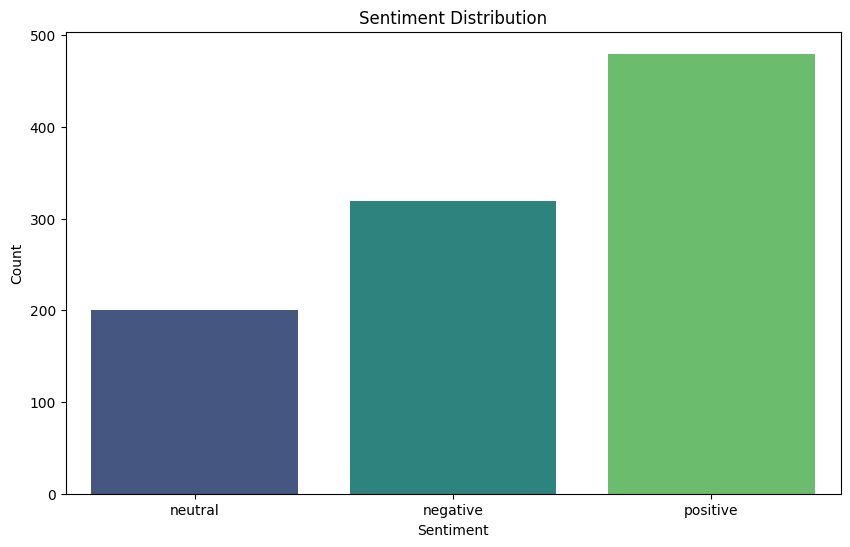

In [13]:
# Visualize the sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [14]:
# Sentiment word clouds
def plot_wordcloud(sentiment):
    text = " ".join(tweet for tweet in data[data['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'{sentiment.capitalize()} Sentiment Word Cloud')
    plt.show()

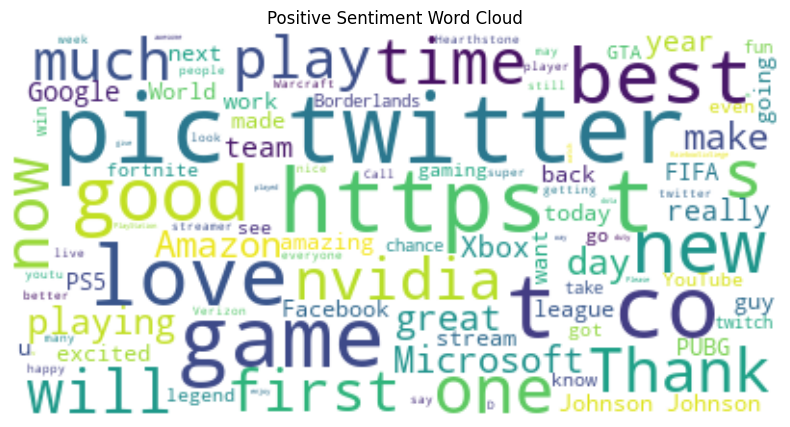

In [15]:
# Generate word clouds for each sentiment
plot_wordcloud('positive')

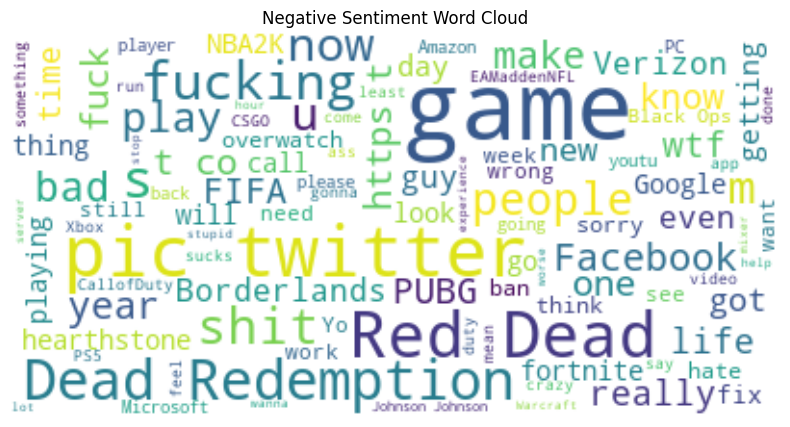

In [16]:
plot_wordcloud('negative')

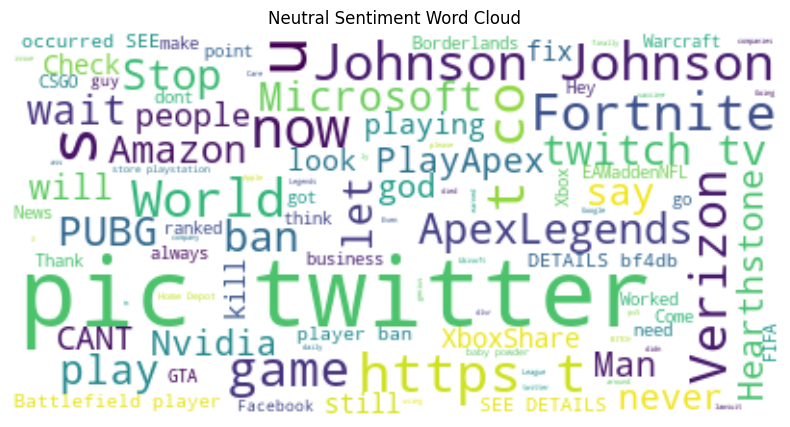

In [17]:
plot_wordcloud('neutral')

In [20]:
# Common Words in Each Sentiment Category
def get_top_n_words(sentiment, n=10):
    text = " ".join(tweet for tweet in data[data['sentiment'] == sentiment]['text'])
    words = text.split()
    common_words = Counter(words).most_common(n)
    return common_words


In [21]:
# Display top 10 words for each sentiment
for sentiment in ['positive', 'negative', 'neutral']:
    common_words = get_top_n_words(sentiment)
    print(f"Top words in {sentiment} tweets:")
    for word, count in common_words:
        print(f"{word}: {count}")
    print()


Top words in positive tweets:
the: 338
to: 235
and: 225
a: 198
I: 167
of: 163
for: 140
is: 135
in: 103
on: 95

Top words in negative tweets:
the: 149
a: 135
to: 127
and: 116
I: 110
is: 97
of: 92
in: 73
for: 61
my: 61

Top words in neutral tweets:
the: 52
to: 45
I: 42
is: 37
and: 30
a: 28
this: 27
of: 27
for: 23
in: 23

